In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Dummy classifier

In [2]:
from sklearn.dummy import DummyClassifier
train_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# dummy_X = train_data.drop("target", axis = 1)
# dummy_y = train_data["target"]

# classifier = DummyClassifier()

# classifier.fit(dummy_X,dummy_y)

# dummy_pred = classifier.predict(test_data)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': dummy_pred})

# submission.to_csv("submission.csv", index=False)

# Preprocessing Pipeline

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Separate the features as X and target as y
X = train_data.drop(columns=['target'])
y = train_data['target']

# Define the preprocessing pipeline

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Define the preprocessing for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)
test_data_preprocessed = preprocessor.transform(test_data)

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("done")

done


# Random Forest Classifier

In [4]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Initialize and train the Random Forest model
# rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rfc_model.fit(X_train, y_train)

# # Make predictions
# y_pred = rfc_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_model.classes_)
# disp.plot()
# plt.show()


In [5]:
# # Submission 

# pred = rfc_model.predict(test_data_preprocessed)
# submission = pd.DataFrame({'id': range(10000), 
#                           'target': pred})

# submission.to_csv("submission.csv", index=False)
# print("done")

# XG_Boost Classifier

Accuracy: 0.62675
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.62      0.66      0.64     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



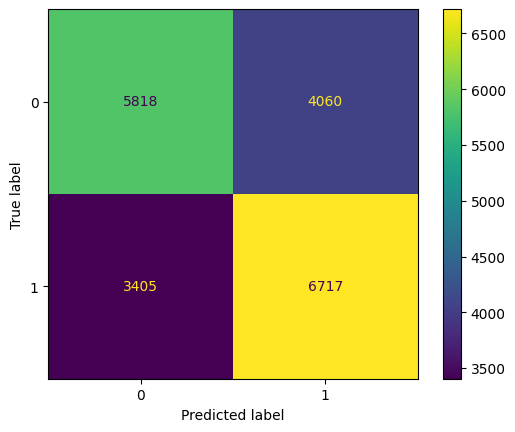

In [6]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgboost_model.classes_)
disp.plot()
plt.show()


In [7]:
# Submission 

pred = xgboost_model.predict(test_data_preprocessed)
submission = pd.DataFrame({'id': range(10000), 
                          'target': pred})

submission.to_csv("submission.csv", index=False)
print("done")

done


In [8]:
pd.DataFrame(train_data.isna().sum())

,0
MachineID,0
ProductName,0
EngineVersion,0
AppVersion,0
SignatureVersion,0
...,...
IsGamer,559
RegionIdentifier,559
DateAS,0
DateOS,24


In [9]:
print("Unique Platforms: ",train_data["PlatformType"].unique())
print("Unique OS versions: ",train_data["OSVersion"].unique())
print("Unique OS versions: ",train_data["OSVersion"].nunique())

Unique Platforms:  ['windows10' 'windows8' 'windows7' 'windows2016']
Unique OS versions:  ['10.0.0.0' '6.3.0.0' '6.1.1.0' '10.0.2.0' '10.0.1.0' '10.0.3.0'
 '10.0.4.0']
Unique OS versions:  7


In [10]:
print(max(train_data["NumAntivirusProductsInstalled"]))

5.0


In [11]:
train_data["IsGamer"].isna().sum()

559

In [12]:
# systems owned by gamers was malware detecte
train_data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [14]:
# handling NA values in "IsGamer" column.

train_data["IsGamer"].fillna(0)  ### Asumning that all are non-gamers
train_data.isna().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [15]:
# Fixing datatypes of columns 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [16]:
train_data["IsGamer"] = train_data["IsGamer"].astype("float")
train_data["target"] = train_data["target"].astype("float")

In [17]:
train_data[( train_data["target"].isin([1.0] )) & ( train_data["IsGamer"].isin([1.0] ))].count()

## Problem faced while runniung this function
# 1. IsGamer column had null values that's why it doesn't worked
# 2. these two columns has different data types so comparision is not possible

MachineID           16294
ProductName         16294
EngineVersion       16294
AppVersion          16294
SignatureVersion    16294
                    ...  
IsGamer             16294
RegionIdentifier    16294
DateAS              16294
DateOS              16293
target              16294
Length: 76, dtype: int64

In [18]:
# train_data["IsPassiveModeEnabled"].isna().sum()
# train_data["RealTimeProtectionState"].isna().sum()
# train_data["RealTimeProtectionState"] = train_data["RealTimeProtectionState"].fillna(method="ffill")


In [19]:
train_data.dtypes   #data types of all the columns.

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target              float64
Length: 76, dtype: object

In [20]:
int_cols = list(train_data.select_dtypes(exclude=object))
int_cols

['IsBetaUser',
 'RealTimeProtectionState',
 'IsPassiveModeEnabled',
 'AntivirusConfigID',
 'NumAntivirusProductsInstalled',
 'NumAntivirusProductsEnabled',
 'HasTpm',
 'CountryID',
 'CityID',
 'GeoRegionID',
 'LocaleEnglishNameID',
 'OSBuildNumber',
 'OSProductSuite',
 'IsSystemProtected',
 'AutoSampleSubmissionEnabled',
 'SMode',
 'IEVersionID',
 'FirewallEnabled',
 'EnableLUA',
 'OEMNameID',
 'OEMModelID',
 'ProcessorCoreCount',
 'ProcessorManufacturerID',
 'ProcessorModelID',
 'PrimaryDiskCapacityMB',
 'SystemVolumeCapacityMB',
 'HasOpticalDiskDrive',
 'TotalPhysicalRAMMB',
 'PrimaryDisplayDiagonalInches',
 'PrimaryDisplayResolutionHorizontal',
 'PrimaryDisplayResolutionVertical',
 'InternalBatteryNumberOfCharges',
 'OSBuildNumberOnly',
 'OSBuildRevisionOnly',
 'OSInstallLanguageID',
 'OSUILocaleID',
 'IsPortableOS',
 'IsFlightsDisabled',
 'FirmwareManufacturerID',
 'FirmwareVersionID',
 'IsSecureBootEnabled',
 'IsVirtualDevice',
 'IsTouchEnabled',
 'IsPenCapable',
 'IsAlwaysOnAlway

In [21]:
import seaborn as sns

In [22]:
train_data[int_cols].isna().sum()

raw_corr_data = train_data[int_cols].fillna(0)

In [23]:
# cat_data_upto_10_unique
cat_df = train_data.select_dtypes(include=object)
cat_df.head()
# cat_df.drop()
# upto_10_unique.head()
upto_10_unique = [ col for col in cat_df.columns if cat_df[col].nunique() <= 10  ]
upto_10_unique

['ProductName',
 'PlatformType',
 'Processor',
 'OSVersion',
 'OsPlatformSubRelease',
 'SKUEditionName',
 'DeviceFamily',
 'PrimaryDiskType',
 'PowerPlatformRole',
 'OSArchitecture',
 'OSInstallType',
 'AutoUpdateOptionsName',
 'OSGenuineState',
 'LicenseActivationChannel',
 'FlightRing']

# Preprocessing

# Random Forest Classifier

In [24]:
print(test_data.columns, train_data.columns)

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio